In [1]:
import sys, os
import importlib
import matplotlib.pyplot as plt

In [2]:
sys.path.append(os.path.abspath(".."))

In [ ]:
import src.eda_univariate
import src.eda_bivariate
from src.artifacts import load_df
from src.config import  CLEAN_PARQUET
importlib.reload(src.eda_univariate)
importlib.reload(src.eda_bivariate)
from src.eda_univariate import (
    target_distribution,
    data_quality_report
)
from src.eda_bivariate import (
    prepare_from_df,chi2_table, anova_table
)



In [4]:
df = load_df(CLEAN_PARQUET)
print("Encoded shape:", df.shape)
df.head()

Encoded shape: (614, 13)


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,True,True
1,1.0,4583,1508.0,128.0,360.0,1.0,True,True,False,False,False,False,False
2,0.0,3000,0.0,66.0,360.0,1.0,True,True,False,True,False,True,True
3,0.0,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,True,True
4,0.0,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,True,True


In [5]:
data_quality_report(df)


===== DATA QUALITY REPORT =====
                         Missing Values  Missing %  Unique Values
Dependents                            0        0.0              4
ApplicantIncome                       0        0.0            505
CoapplicantIncome                     0        0.0            287
LoanAmount                            0        0.0            203
Loan_Amount_Term                      0        0.0             10
Credit_History                        0        0.0              2
Gender_Male                           0        0.0              2
Married_Yes                           0        0.0              2
Education_Not Graduate                0        0.0              2
Self_Employed_Yes                     0        0.0              2
Property_Area_Semiurban               0        0.0              2
Property_Area_Urban                   0        0.0              2
Loan_Status_Y                         0        0.0              2

👉 Business Insights:
   - No column has ex


===== Target Variable: Loan_Status_Y =====
               Count  Percent
Loan_Status_Y                
True             422    68.73
False            192    31.27
👉 Approval rate: NA% | Rejection rate: NA%


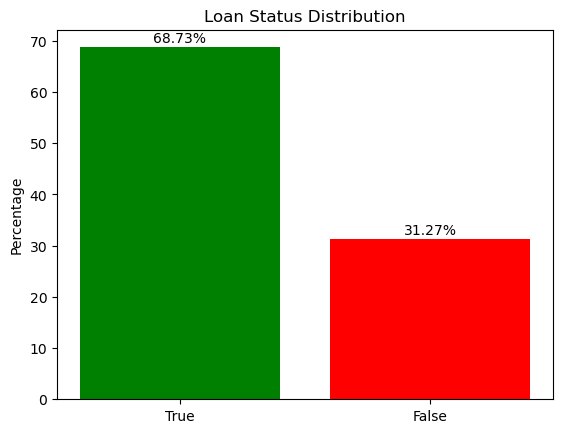

In [6]:
target_distribution(df)

In [7]:
X, X_scaled, y = prepare_from_df(df, target="Loan_Status_Y")


In [8]:
chi2_df = chi2_table(X_scaled, y, X.columns)
anova_df = anova_table(X, y, X.columns)


NameError: name 'chi2_table' is not defined

In [ ]:
print_scorecard(anova_df, top_n=5, method="ANOVA")
print_scorecard(chi2_df, top_n=5, method="Chi2")